In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:
df_sellers = pd.read_csv('sellers.csv')
df_buyers = pd.read_csv('buyers.csv')

In [3]:
df_sellers.head()

,min_value,expected_value,success,day
0,7.0,7.0,False,1
1,9.0,9.0,False,1
2,5.0,5.0,False,1
3,10.0,10.0,False,1
4,7.0,7.7,True,1


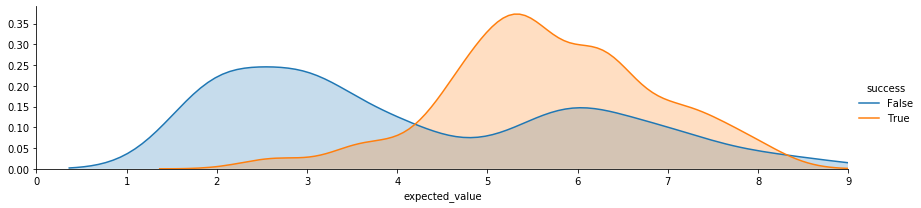

In [7]:
fig = sns.FacetGrid(df_buyers, hue="success", aspect=4)
fig.map(sns.kdeplot, 'expected_value', shade=True)
max_val = df_buyers['expected_value'].max()
fig.set(xlim = (0,max_val))
fig.add_legend()

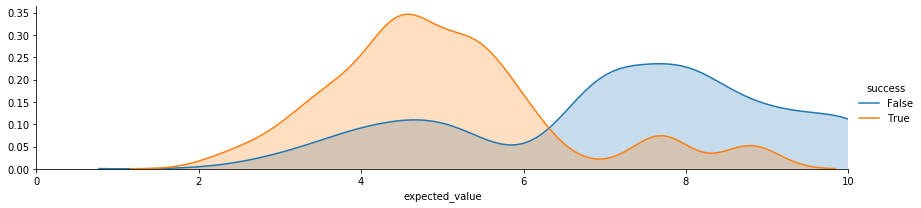

In [8]:
fig = sns.FacetGrid(df_sellers, hue="success", aspect=4)
fig.map(sns.kdeplot, 'expected_value', shade=True)
max_val = df_sellers['expected_value'].max()
fig.set(xlim = (0,max_val))
fig.add_legend()

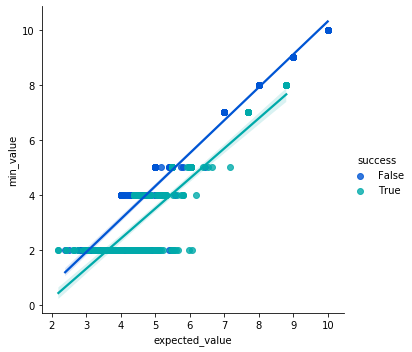

In [9]:
sns.lmplot('expected_value', 'min_value', hue='success', data=df_sellers, palette='winter')

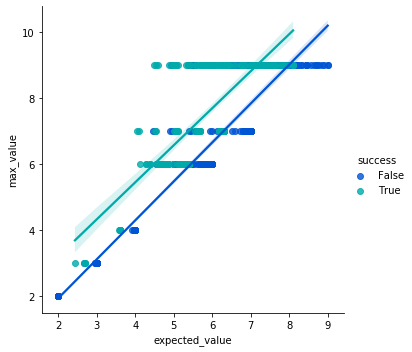

In [10]:
sns.lmplot('expected_value', 'max_value', hue='success', data=df_buyers, palette='winter')

In [19]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="day", y="expected_value", hue="success",data=df_buyers)

TypeError: 'module' object is not callable